# **Act 1. Regresion lineal Simple**

> CO2 Emission by Vehicles

- **Andrés Alejandro Guzmán González | A01633819**
- **Joel Isaias Solano Ocampo | A01639289**
- **Tania Sayuri Guizado Hernández | A01640092**
- **Ernesto Reynoso Lizárraga | A01639915**

---

**Contenidos**

- **5.1** - Temas avanzados sobre análisis regresión

- **5.1.1** - Verificación de supuestos: QQ-plots & análisis de residuales

- **5.2** - Estadística para datos multivariados

**1. ¿Cuáles son las caracteríaticas que más influyen en la emisión de CO2?**

    Considerando las pruebas realizadas en esta actividad, las
    variables con más influencias en la emisión de Dioxido de Carbono
     (CO2) son:
      * Fuel Consumption Comb (mpg)
      * Fuel Consumption Comb (L/100 km)
      * Fuel Consumption City (L/100 km)

      Pues su correlación es mayor a 0.8
    

**2. ¿Habrá alguna diferencia en la emisiones de CO2  cuando el consumo de combustible para la ciudad y carretera se consideran por separado?**

    
    Si, ya que el consumo de combustime en la ciudad tiene una mayor     
    correlación con el gasto total. Al combinarlos es más cercana la
    predicción a las emisiones de Dioxido de Carbono (CO2) totales.
    Esto se da ya que al suponer que las emisiones  Pues así al combiarlas
    el consumo
    


##Llamado a librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, uniform, skewnorm

##Importamos los datos a un DataFrame

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Reto IA/Actividades/CO2_Emissions/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


##Funciones genereales

In [ ]:
def plt_scatter(x, y, xl, yl):
  plt.subplot(1, 2, 1)
  plt.scatter(x, y)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.grid()

In [ ]:
def plt_scatter_w_line(x, y, b0, b1, xl, yl):
  x_line = np.linspace(min(x), max(x), 100)
  y_line = b0 + b1 * x_line
  plt.subplot(1, 2, 2)
  plt.scatter(x,y)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.grid()

  plt.plot(x_line, y_line, color='red')

In [ ]:
def Asimetric_Dist(r, title):
  plt.hist(r, density = True, bins = 'auto', histtype='stepfilled', alpha=0.2)
  plt.title(title)
  plt.grid()
  plt.show()

In [ ]:
def OLS(x, y):
  x = sm.add_constant(x)
  model = sm.OLS(y, x)
  result = model.fit()
  print('Params:', result.params)
  print('R^2:', result.rsquared)

## Engine Size(L)

In [ ]:
x_ms = df['Engine Size(L)']
y = df['CO2 Emissions(g/km)']

In [ ]:
X_ms = sm.add_constant(x_ms)
print(X_ms.shape)
print(X_ms)

(7385, 2)
      const  Engine Size(L)
0       1.0             2.0
1       1.0             2.4
2       1.0             1.5
3       1.0             3.5
4       1.0             3.5
...     ...             ...
7380    1.0             2.0
7381    1.0             2.0
7382    1.0             2.0
7383    1.0             2.0
7384    1.0             2.0

[7385 rows x 2 columns]


In [ ]:
model = sm.OLS(y,X_ms)
result = model.fit()
result.params

const             134.365893
Engine Size(L)     36.777315
dtype: float64

In [ ]:
print("\nR2: ", result.rsquared)


R2:  0.7244472046524082


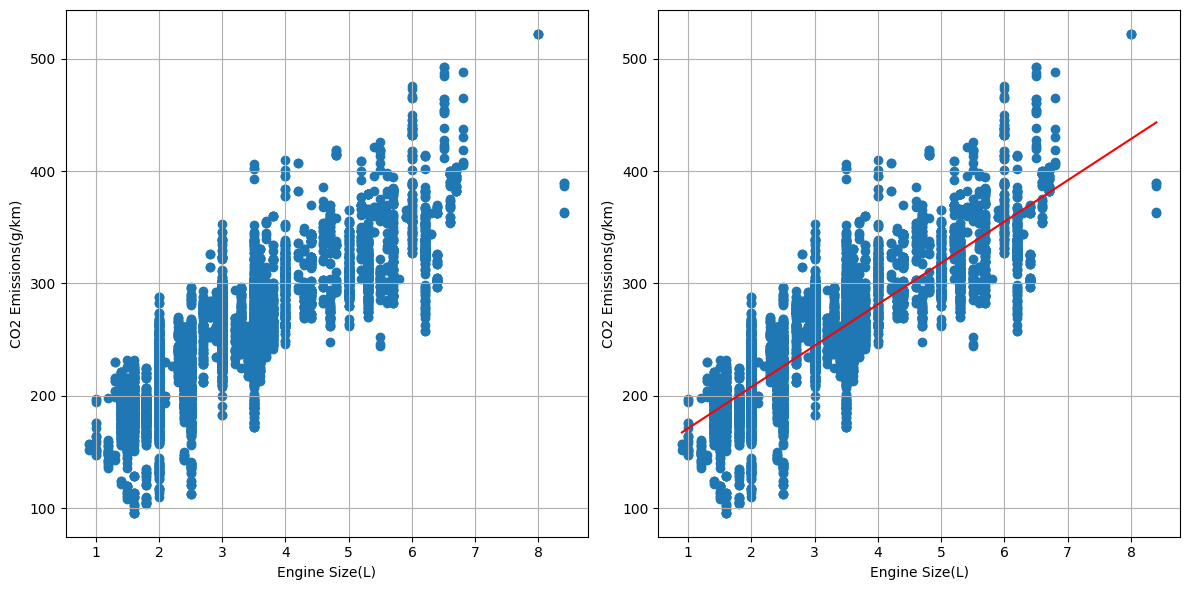

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_ms, y, 'Engine Size(L)', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_ms, y, result.params[0], result.params[1], 'Engine Size(L)', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

## Cylinders

In [ ]:
x_cyl = df['Cylinders']
X_cyl = sm.add_constant(x_cyl)
model = sm.OLS(y,X_cyl)
result = model.fit()
result.params

const        100.956915
Cylinders     26.647724
dtype: float64

In [ ]:
print("\nR2: ", result.rsquared)


R2:  0.6932953649936133


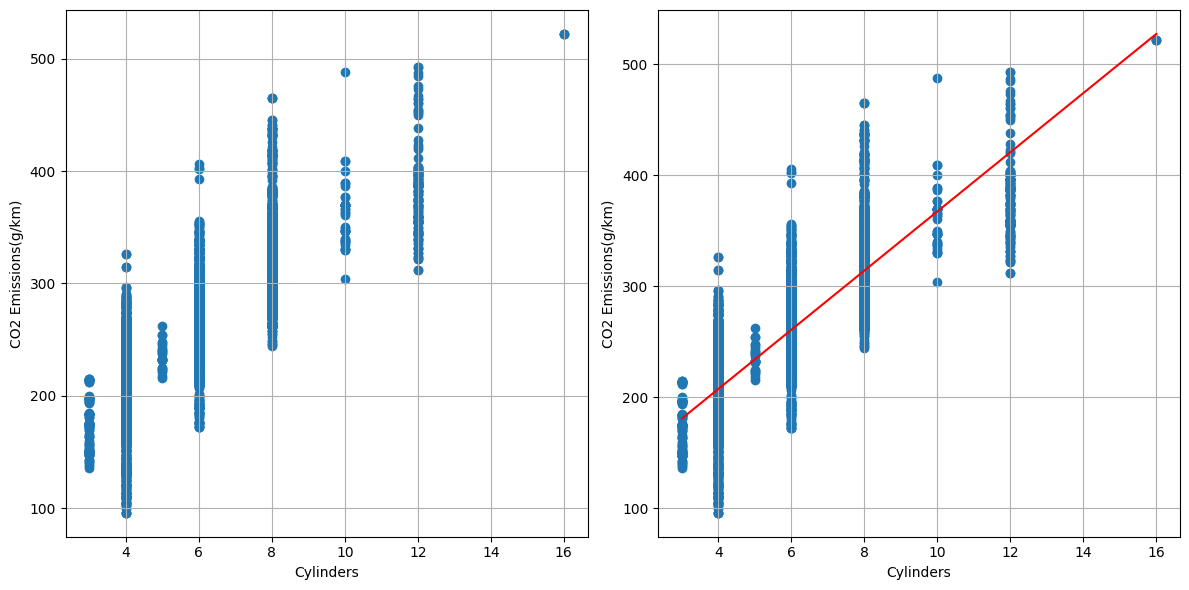

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_cyl, y, 'Cylinders', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_cyl, y, result.params[0], result.params[1], 'Cylinders', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

## Fuel Consumption Hwy (L/100 km)

In [ ]:
x_fch = df['Fuel Consumption Hwy (L/100 km)']
X_fch = sm.add_constant(x_fch)
model = sm.OLS(y,X_fch)
result = model.fit()
print(result.params)
print("\nR2: ", result.rsquared)

const                              40.448581
Fuel Consumption Hwy (L/100 km)    23.240759
dtype: float64

R2:  0.7806357669286315


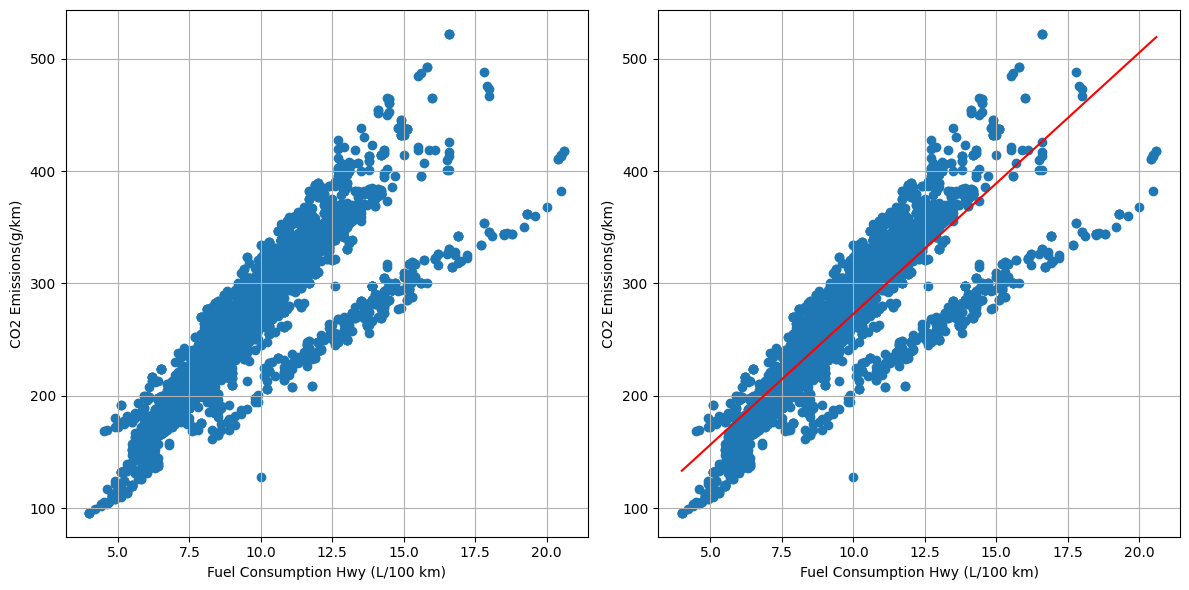

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_fch, y, 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_fch, y, result.params[0], result.params[1], 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

##Análisis de distribuciones

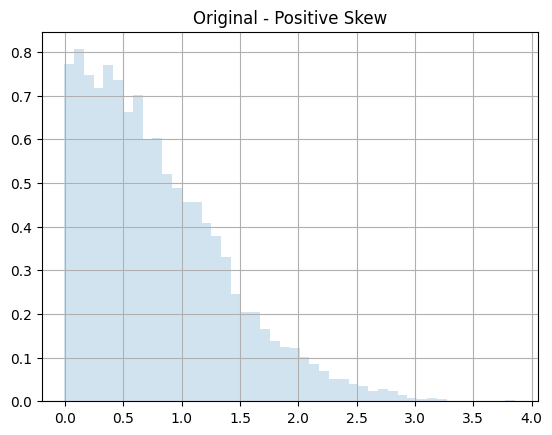

In [ ]:
y_skew = skewnorm.rvs(y)
Asimetric_Dist(y_skew, 'Original - Positive Skew')

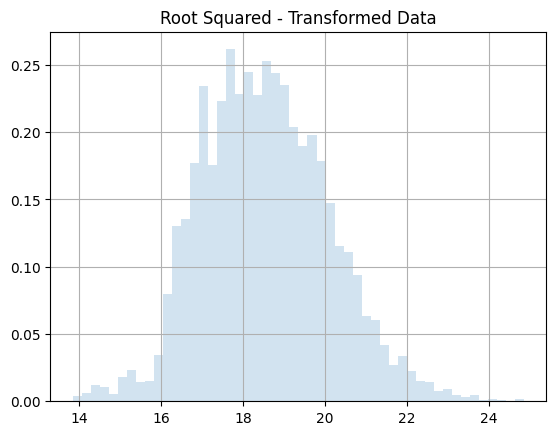

In [ ]:
y_root = np.sqrt(y + abs(min(y)))
Asimetric_Dist(y_root, 'Root Squared - Transformed Data')

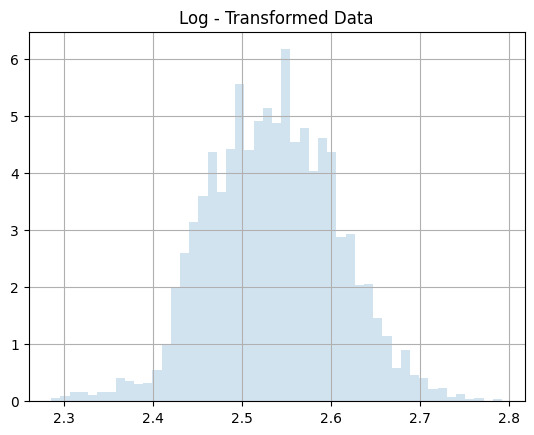

In [ ]:
y_log = np.log10(1 + y + abs(min(y)))
Asimetric_Dist(y_log, 'Log - Transformed Data')

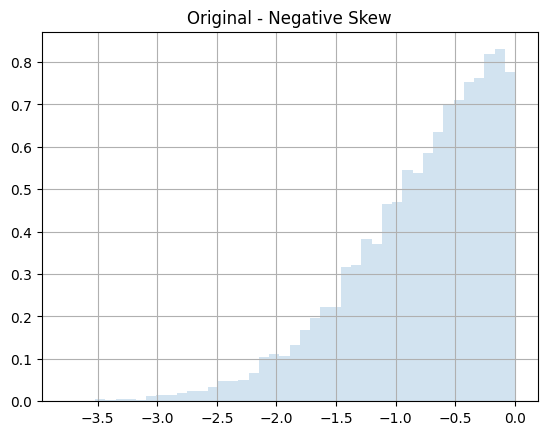

In [ ]:
y_skew_neg = -skewnorm.rvs(y)
Asimetric_Dist(y_skew_neg, 'Original - Negative Skew')

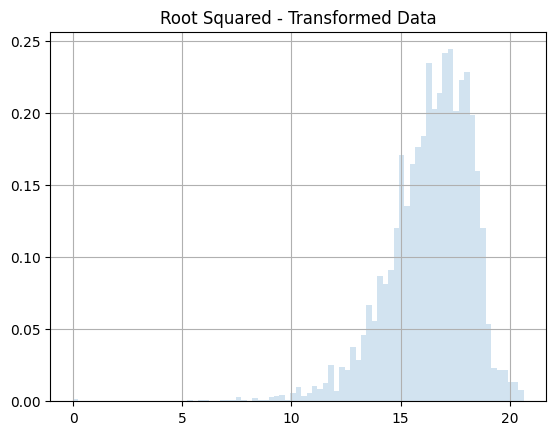

In [ ]:
y_pos = y + abs(min(y))
y_root_neg = np.sqrt(max(y_pos) - y_pos)
Asimetric_Dist(y_root_neg, 'Root Squared - Transformed Data')

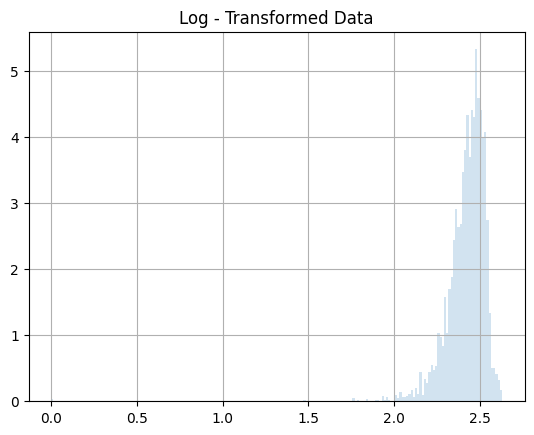

In [ ]:
y_positive = y + abs(min(y))
y_log_neg = np.log10(1 + max(y_positive) - y_positive)
Asimetric_Dist(y_log_neg, 'Log - Transformed Data')

## Fuel Consumption City (L/100 km)

In [ ]:
x_fcct = df['Fuel Consumption City (L/100 km)']
X_fcct = sm.add_constant(x_fcct)
model = sm.OLS(y,X_fcct)
result = model.fit()
print(result.params)
print("\nR2: ", result.rsquared)

const                               57.559903
Fuel Consumption City (L/100 km)    15.372459
dtype: float64

R2:  0.8456503198972763


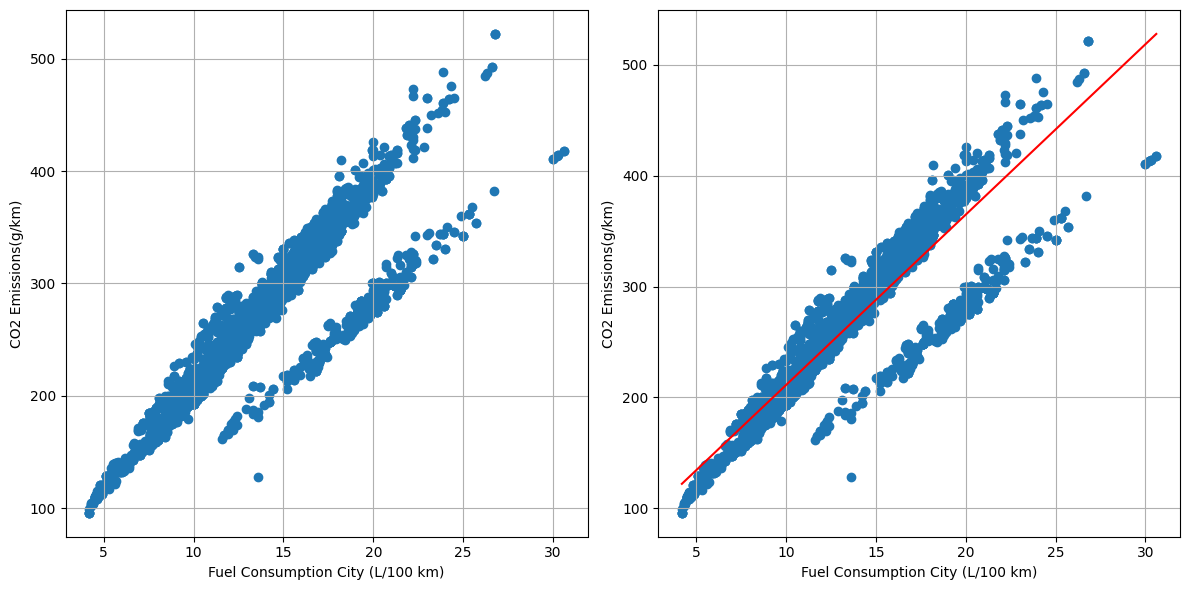

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_fcct, y, 'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_fcct, y, result.params[0], result.params[1], 'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

In [ ]:
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.846
Model:                             OLS   Adj. R-squared:                  0.846
Method:                  Least Squares   F-statistic:                 4.045e+04
Date:                 Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                         02:13:24   Log-Likelihood:                -33630.
No. Observations:                 7385   AIC:                         6.726e+04
Df Residuals:                     7383   BIC:                         6.728e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

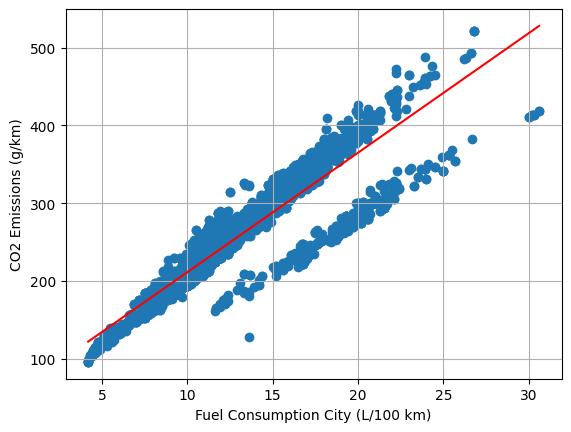

In [ ]:
x_line = np.linspace(min(x_fcct), max(x_fcct), 100)
y_line = result.params[0] + result.params[1] * x_line
plt.scatter(x_fcct,y)
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid()

plt.plot(x_line, y_line, color='red')

plt.show()

In [ ]:
influence = result.get_influence()
std_residual = influence.resid_studentized_internal
print(std_residual)

[-0.5980394  -0.37982853 -0.60022109 ...  0.11233374  0.09868503
  0.12598264]


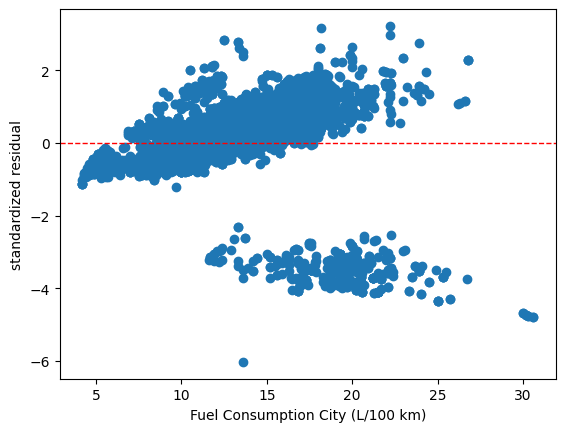

In [ ]:
plt.scatter(x_fcct, std_residual)
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('standardized residual')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

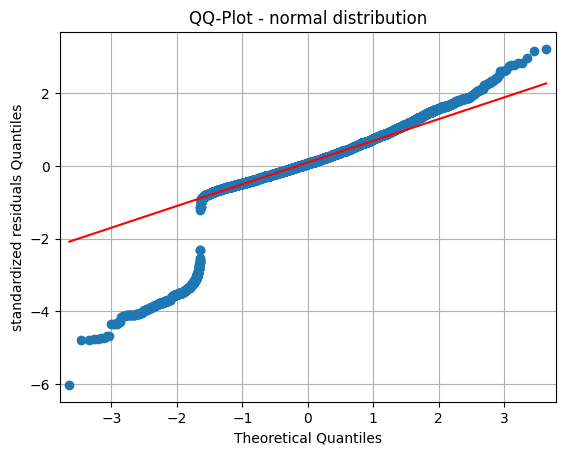

In [ ]:
fig = sm.qqplot(std_residual, dist=norm, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - normal distribution")
plt.grid()

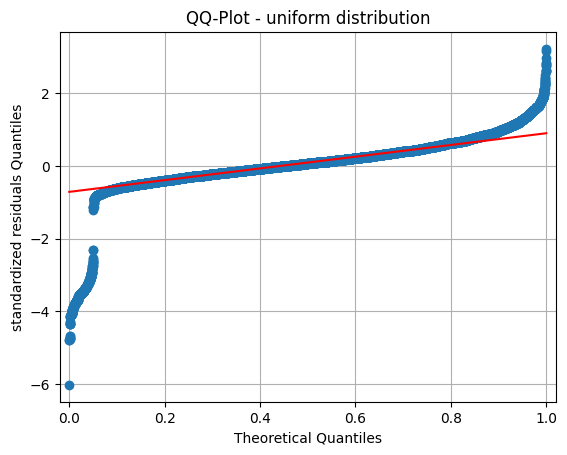

In [ ]:
fig = sm.qqplot(std_residual, dist=uniform, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - uniform distribution")
plt.grid()

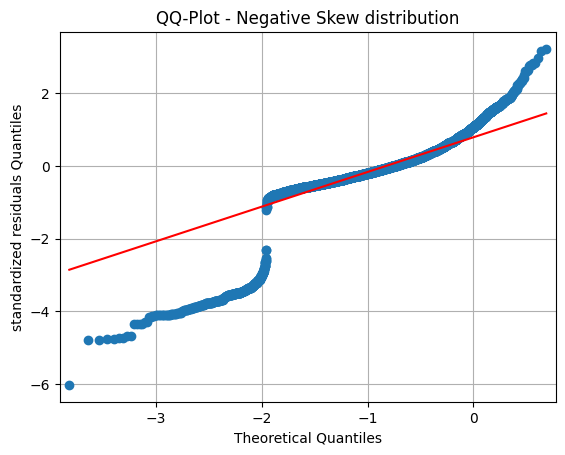

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(-4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Negative Skew distribution")
plt.grid()

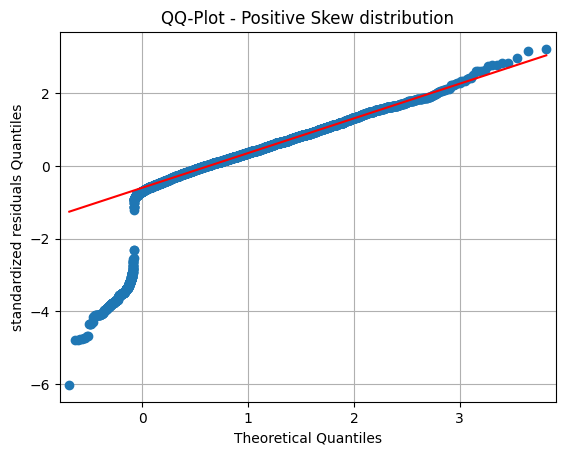

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Positive Skew distribution")
plt.grid()

In [ ]:
OLS(x_fcct, y_root)

Params: const                               13.419645
Fuel Consumption City (L/100 km)     0.408706
dtype: float64
R^2: 0.844322646434444


In [ ]:
OLS(x_fcct, y_log)

Params: const                               2.296990
Fuel Consumption City (L/100 km)    0.018955
dtype: float64
R^2: 0.836968070475829


## Fuel Consumption Comb (mpg)



In [ ]:
x_fcc = df['Fuel Consumption Comb (mpg)']
X_fcc = sm.add_constant(x_fcc)
model = sm.OLS(y,X_fcc)
result = model.fit()
print(result.params)
print("\nR2: ", result.rsquared)

const                          452.353036
Fuel Consumption Comb (mpg)     -7.341929
dtype: float64

R2:  0.8234224657110062


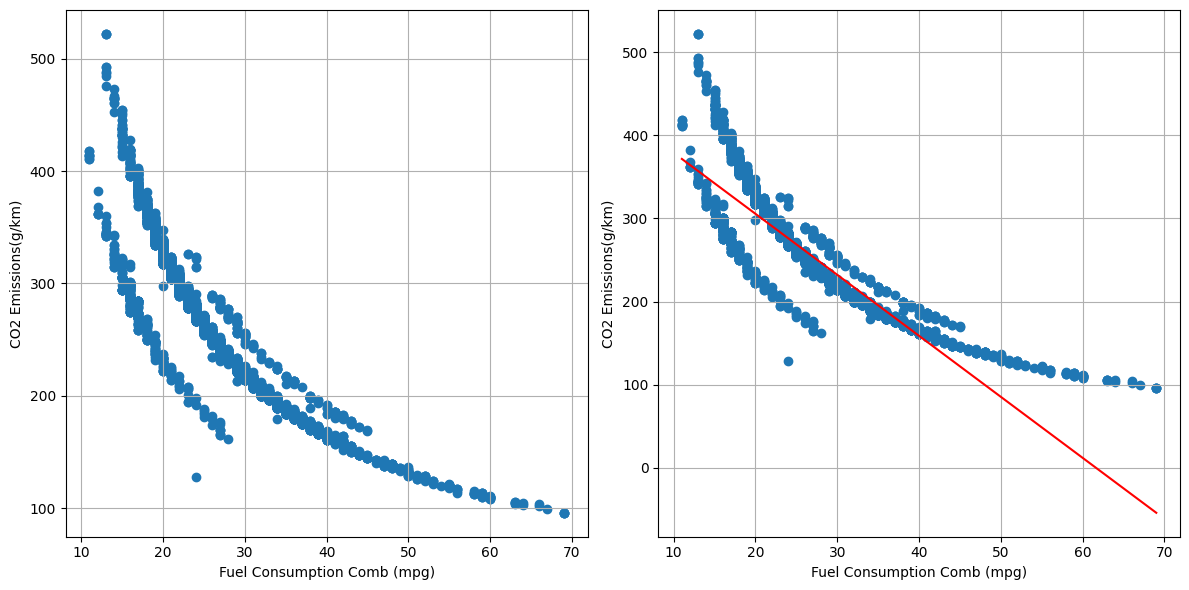

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_fcc, y, 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_fcc, y, result.params[0], result.params[1], 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

In [ ]:
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.823
Model:                             OLS   Adj. R-squared:                  0.823
Method:                  Least Squares   F-statistic:                 3.443e+04
Date:                 Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                         02:13:29   Log-Likelihood:                -34127.
No. Observations:                 7385   AIC:                         6.826e+04
Df Residuals:                     7383   BIC:                         6.827e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const   

In [ ]:
influence = result.get_influence()
std_residual = influence.resid_studentized_internal
print(std_residual)

[-0.57223492 -0.74985292  1.46736968 ... -0.57431008 -0.30247323
 -0.54754722]


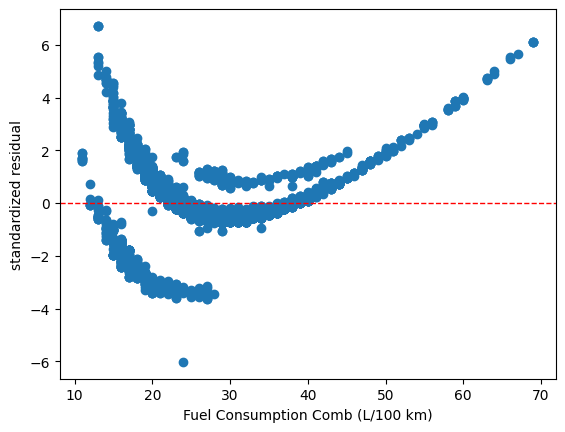

In [ ]:
plt.scatter(x_fcc, std_residual)
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('standardized residual')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

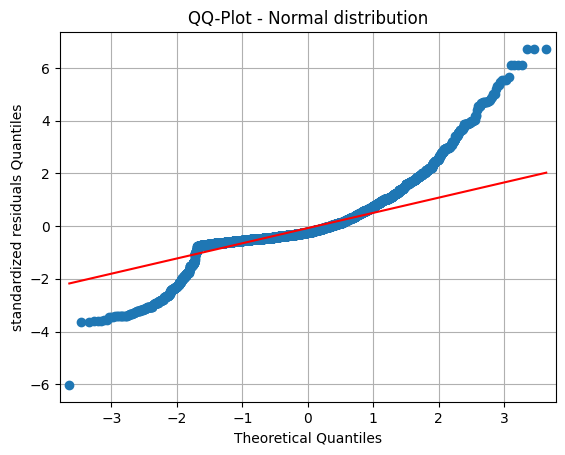

In [ ]:
fig = sm.qqplot(std_residual, dist=norm, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Normal distribution")
plt.grid()

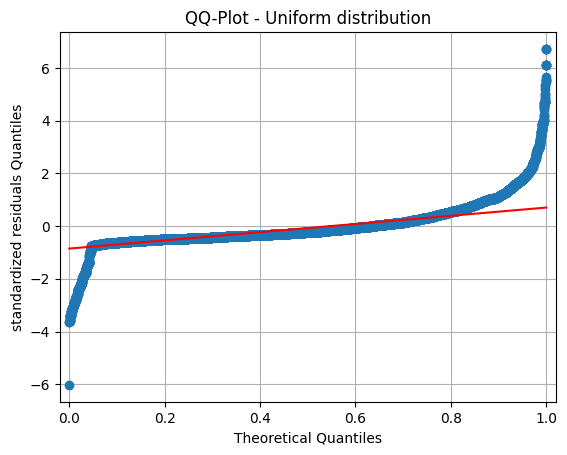

In [ ]:
fig = sm.qqplot(std_residual, dist=uniform, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Uniform distribution")
plt.grid()

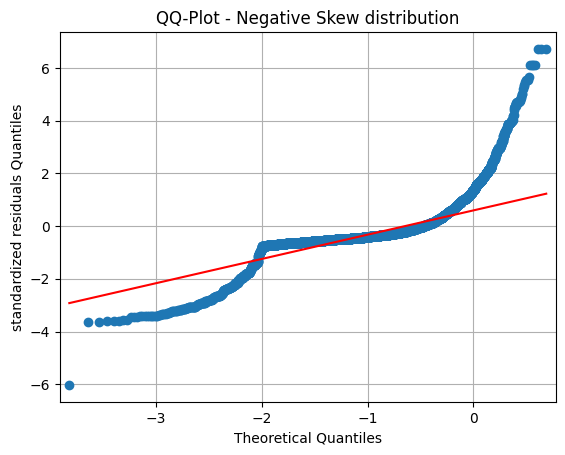

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(-4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Negative Skew distribution")
plt.grid()

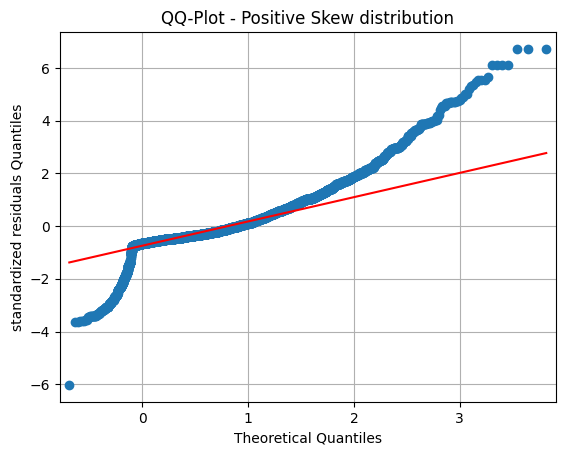

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Positive Skew distribution")
plt.grid()

In [ ]:
OLS(x_fcc, y_root)

Params: const                          24.024339
Fuel Consumption Comb (mpg)    -0.199142
dtype: float64
R^2: 0.8556794221893714


In [ ]:
OLS(x_fcc, y_log)

Params: const                          2.793990
Fuel Consumption Comb (mpg)   -0.009424
dtype: float64
R^2: 0.8831148871092463


## Fuel Consumption Comb (L/100 km)

In [ ]:
x_fccl = df['Fuel Consumption Comb (L/100 km)']
X_fccl = sm.add_constant(x_fccl)
model = sm.OLS(y,X_fccl)
result = model.fit()
print(result.params)
print("\nR2: ", result.rsquared)

const                               46.763152
Fuel Consumption Comb (L/100 km)    18.571319
dtype: float64

R2:  0.8428186895623988


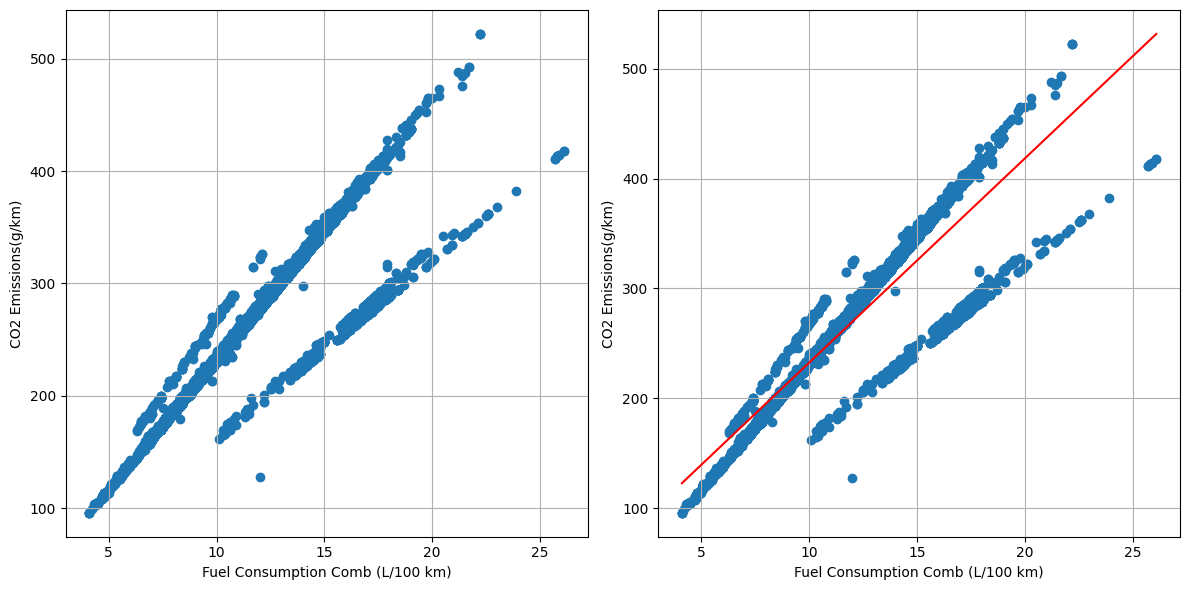

In [ ]:
plt.figure(figsize=(12, 6))
plt_scatter(x_fccl, y, 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)')
plt_scatter_w_line(x_fccl, y, result.params[0], result.params[1], 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

In [ ]:
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.843
Model:                             OLS   Adj. R-squared:                  0.843
Method:                  Least Squares   F-statistic:                 3.959e+04
Date:                 Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                         02:13:27   Log-Likelihood:                -33697.
No. Observations:                 7385   AIC:                         6.740e+04
Df Residuals:                     7383   BIC:                         6.741e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
influence = result.get_influence()
std_residual = influence.resid_studentized_internal
print(std_residual)

[-0.37157485 -0.17449253 -0.87672126 ...  0.0841568   0.05952249
  0.10879112]


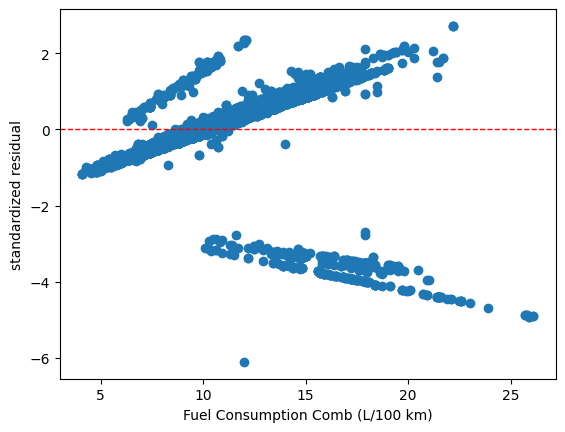

In [ ]:
plt.scatter(df['Fuel Consumption Comb (L/100 km)'], std_residual)
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('standardized residual')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

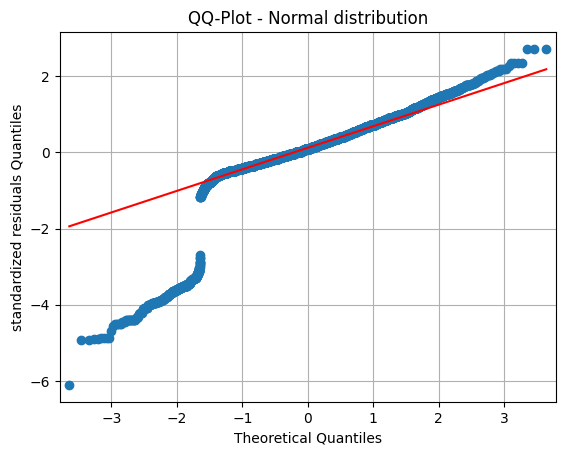

In [ ]:
fig = sm.qqplot(std_residual, dist=norm, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Normal distribution")
plt.grid()

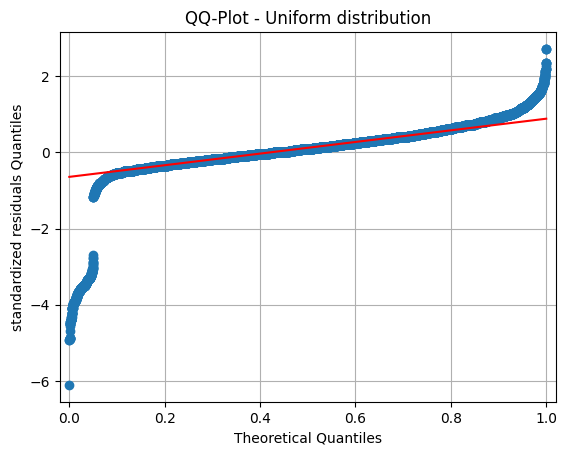

In [ ]:
fig = sm.qqplot(std_residual, dist=uniform, line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Uniform distribution")
plt.grid()

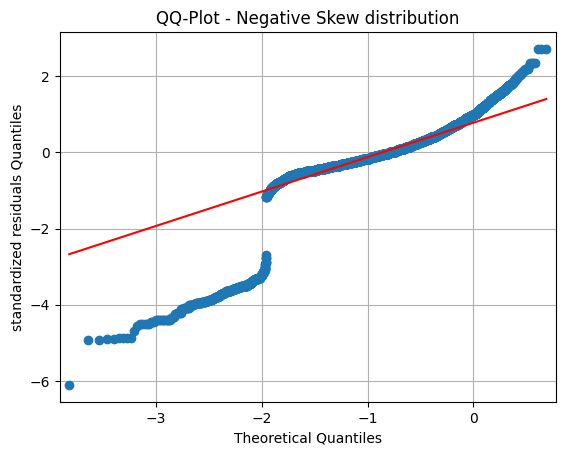

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(-4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Negative Skew distribution")
plt.grid()

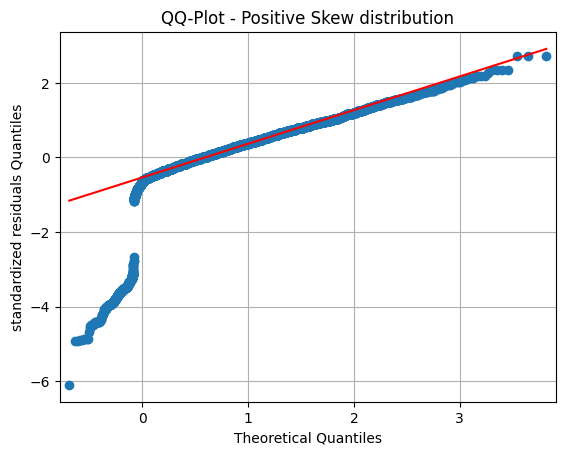

In [ ]:
fig = sm.qqplot(std_residual, skewnorm(4), line="q")
plt.ylabel("standardized residuals Quantiles")
plt.title("QQ-Plot - Positive Skew distribution")
plt.grid()

In [ ]:
OLS(x_fccl, y_root)

Params: const                               13.134986
Fuel Consumption Comb (L/100 km)     0.493536
dtype: float64
R^2: 0.8407523790886398


In [ ]:
OLS(x_fccl, y_log)

Params: const                               2.283923
Fuel Consumption Comb (L/100 km)    0.022877
dtype: float64
R^2: 0.8325284987248827
